# **Prediksi Genre Lagu Menggunakan Algoritma K-Nearest Neighbors (KNN)**

Musik telah menjadi bagian penting dari kehidupan kita. Dengan jutaan lagu yang tersedia di platform seperti Spotify, analisis data musik menjadi semakin relevan. Proyek ini bertujuan untuk memahami atribut lagu seperti danceability, energy, dan tempo, serta memanfaatkan data tersebut untuk memprediksi genre dengan akurasi tinggi.

# Import Library

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Data Preparation

Dataset ini berasal dari Spotify melalui paket spotifyr, yang dikembangkan oleh Charlie Thompson, Josiah Parry, Donal Phipps, dan Tom Wolff untuk memudahkan pengambilan data pribadi atau metadata umum lagu dari API Spotify.Yang kemudian didownload dan simpan di drive agar lebih mudah

Kaylin Pavlik menggunakan paket spotifyr untuk mengumpulkan sekitar 5.000 lagu dari enam kategori utama: EDM, Latin, Pop, R&B, Rap, dan Rock.

Dataset ini mencakup berbagai variabel yang menggambarkan fitur audio dan metadata lagu, seperti:

- track_id: ID unik lagu
- track_name: Nama lagu
- track_artist: Nama artis
- track_popularity: Skor popularitas lagu
- track_album_id: ID album
- track_album_name: Nama album
- track_album_release_date: Tanggal rilis album
- playlist_name: Nama playlist
- playlist_id: ID playlist
- playlist_genre: Genre playlist
- playlist_subgenre: Subgenre playlist
- danceability: Tingkat kemudahan lagu untuk menari
- energy: Tingkat energi lagu
- key: Kunci musik lagu
- loudness: Tingkat kekerasan suara lagu
- mode: Modus lagu (mayor atau minor)
- speechiness: Tingkat kehadiran kata-kata yang diucapkan dalam lagu
- acousticness: Kemungkinan lagu adalah akustik
- instrumentalness: Tingkat instrumental dalam lagu
- liveness: Kemungkinan lagu direkam secara live
- valence: Tingkat positif atau bahagia dari lagu
- tempo: Kecepatan tempo lagu
- duration_ms: Durasi lagu dalam milidetik
Informasi spesifik mengenai penanganan nilai hilang atau metode imputasi dalam dataset ini tidak dijelaskan secara rinci dalam sumber yang tersedia.

Sumber asli data diperoleh dari Spotify melalui paket Python bernama [spotifyr](https://github.com/charlie86/spotifyr). Paket ini memungkinkan akses ke data pribadi atau metadata umum lagu dari API Spotify. Data dikumpulkan oleh Kaylin Pavlik, yang mengakses dan menyusun dataset ini untuk proyek analisis data di platform [TidyTuesday](https://github.com/rfordatascience/tidytuesday).

Informasi lebih lanjut tentang dataset ini dapat diakses melalui halaman resminya di [TidyTuesday](https://github.com/rfordatascience/tidytuesday) [GitHub](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-01-21/readme.md).

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1xlYt-4fAhzH_qcMwgt3zQ-pT4J0LUTn3' -O data.zip
!unzip data.zip

--2025-01-02 12:58:08--  https://drive.google.com/uc?export=download&id=1xlYt-4fAhzH_qcMwgt3zQ-pT4J0LUTn3
Resolving drive.google.com (drive.google.com)... 172.217.0.78, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|172.217.0.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1xlYt-4fAhzH_qcMwgt3zQ-pT4J0LUTn3&export=download [following]
--2025-01-02 12:58:09--  https://drive.usercontent.google.com/download?id=1xlYt-4fAhzH_qcMwgt3zQ-pT4J0LUTn3&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.164.1, 2607:f8b0:4025:803::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.164.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7971652 (7.6M) [application/octet-stream]
Saving to: ‘data.zip’

data.zip            100%[===================>]   7.60M  36.4MB/s    in 0.2s    

2025



1.   Tujuan: Mengimpor dataset dari file CSV yang berisi data tentang lagu Spotify.
2.   Alasan: Membaca file ke dalam DataFrame pandas memungkinkan manipulasi dan analisis data yang efisien.



In [ ]:
# Load the dataset
df = pd.read_csv('/content/spotify_songs.csv')

# Display the first 5 rows
print("First 5 rows:")
print(df.head())

# Display the last 5 rows
print("\nLast 5 rows:")
print(df.tail())

First 5 rows:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieb

## Data Cleaning

Langkah pertama adalah menangani duplikasi dengan mengidentifikasi dan menghapus baris yang sama, memastikan setiap entri unik sehingga analisis tidak terganggu oleh data yang berulang.

In [ ]:
# Check for duplicates
def handle_duplicates(df):
    df = df.drop_duplicates()
    return df

Selanjutnya, data hilang ditangani dengan mengisi nilai kosong menggunakan metode yang sesuai: rata-rata untuk kolom numerik agar distribusi data tetap terjaga, dan modus untuk kolom kategorikal guna mempertahankan konsistensi.

In [ ]:
# Handle missing data
def handle_missing_data(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['float64', 'int64']:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df

Setelah itu, outlier dideteksi menggunakan metode Interquartile Range (IQR) dan ditangani dengan membatasi nilai di luar rentang normal (capping), sehingga pengaruh data ekstrem terhadap analisis dapat diminimalkan tanpa menghilangkan informasi penting.

In [ ]:
# Detect and handle outliers using IQR
def detect_and_handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound

    return df

Kemudian, data numerik dinormalisasi menggunakan skala Min-Max untuk memastikan setiap fitur berada dalam rentang yang sama, yang sangat penting bagi algoritma machine learning yang sensitif terhadap perbedaan skala.

In [ ]:
# Normalize data using Min-Max Scaling
def normalize_data(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

Terakhir, data awal dan hasil akhir pembersihan ditampilkan untuk memverifikasi bahwa semua langkah telah diterapkan dengan benar dan dataset siap untuk analisis lebih lanjut. Proses ini dirancang untuk meningkatkan kualitas dan keandalan data.

In [ ]:
# Generate summary for key variables
def generate_variable_summary():
    summary = {
        "track_popularity": "Rata-rata popularitas lagu adalah 42.48 dengan standar deviasi 24.98, menunjukkan adanya distribusi yang cukup lebar dari popularitas lagu-lagu ini (rentang: 0–100).",
        "danceability": "Rata-rata nilai danceability adalah 0.65, dengan sebagian besar lagu berada dalam kisaran menengah hingga tinggi (Q1 = 0.56, Q3 = 0.76).",
        "energy": "Lagu memiliki tingkat energi rata-rata 0.70, menunjukkan bahwa banyak lagu dalam dataset ini memiliki energi yang tinggi.",
        "tempo": "Tempo rata-rata adalah 120.88 BPM (beats per minute), sesuai dengan lagu-lagu populer yang sering memiliki tempo yang cocok untuk menari.",
        "duration_ms": "Durasi rata-rata lagu adalah sekitar 3 menit 45 detik (225,800 ms), dengan beberapa lagu yang jauh lebih pendek atau lebih panjang."
    }
    return summary

# Display variable summary
def display_variable_summary():
    summary = generate_variable_summary()
    print("\nRingkasan Variabel:")
    for key, value in summary.items():
        print(f"- {key}: {value}")

# Main cleaning function
def clean_data(df):
    df = handle_duplicates(df)
    df = handle_missing_data(df)

    numerical_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
    df = detect_and_handle_outliers(df, numerical_columns)
    df = normalize_data(df, numerical_columns)

    # Display the final dataset as a table
    print("\nTabel Hasil Akhir:")
    print(tabulate(df.head(), headers='keys', tablefmt='grid'))

    # Display variable summary
    display_variable_summary()
    return df

# Example usage
df = clean_data(df)


Tabel Hasil Akhir:
+----+------------------------+-------------------------------------------------------+------------------+--------------------+------------------------+-------------------------------------------------------+----------------------------+-----------------+------------------------+------------------+---------------------+----------------+----------+-------+------------+--------+---------------+----------------+--------------------+------------+-----------+----------+---------------+
|    | track_id               | track_name                                            | track_artist     |   track_popularity | track_album_id         | track_album_name                                      | track_album_release_date   | playlist_name   | playlist_id            | playlist_genre   | playlist_subgenre   |   danceability |   energy |   key |   loudness |   mode |   speechiness |   acousticness |   instrumentalness |   liveness |   valence |    tempo |   duration_ms |
+====+==

<ipython-input-5-c4ac97bdb4b2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


# EDA

Selanjutnya, kita mengeksplorasi dataset untuk menemukan pola dan hubungan antar atribut.

Distribusi popularitas lagu menunjukkan bahwa sebagian besar lagu berada pada tingkat popularitas menengah

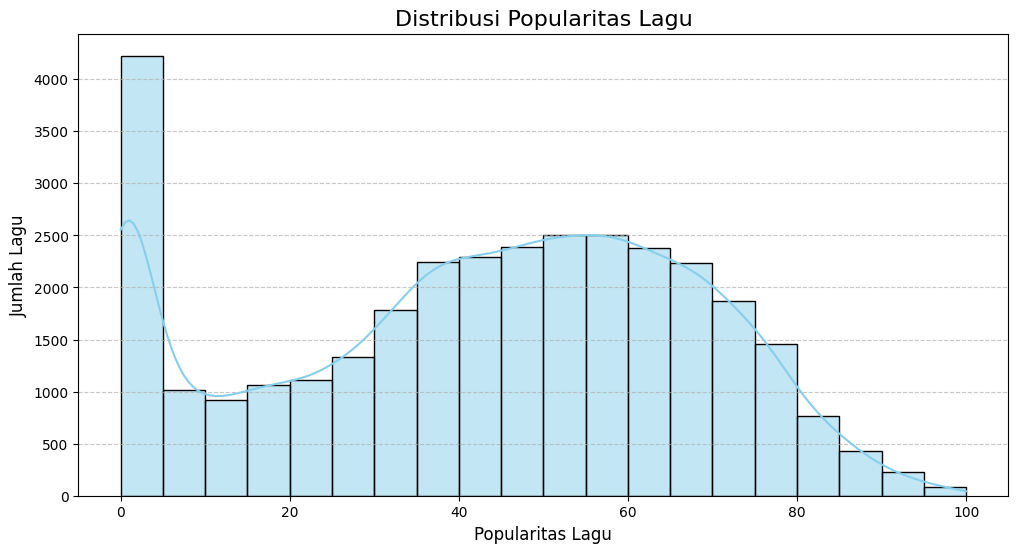

In [ ]:
# Distribusi Popularitas Lagu
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color='skyblue')
plt.title('Distribusi Popularitas Lagu', fontsize=16)
plt.xlabel('Popularitas Lagu', fontsize=12)
plt.ylabel('Jumlah Lagu', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Menilai korelasi antar fitur audio seperti danceability, energy, dan tempo untuk mengidentifikasi hubungan yang signifikan antara fitur-fitur tersebut. Hal ini dapat membantu memahami faktor yang memengaruhi popularitas lagu.

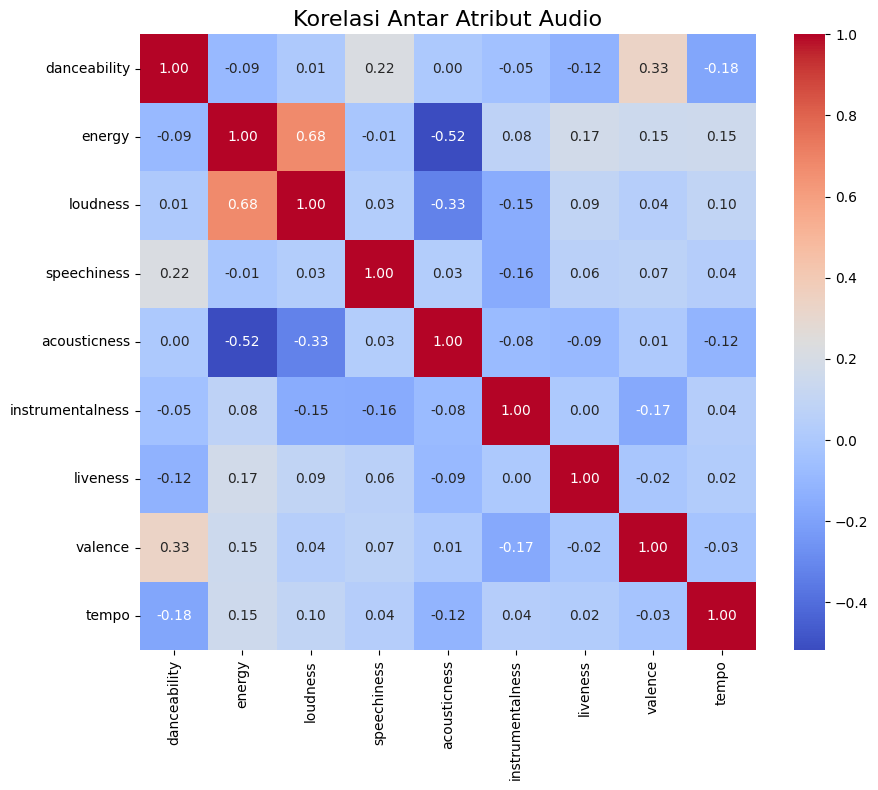

In [ ]:
# Korelasi Antar Atribut Audio
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo']
correlation_matrix = df[audio_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Korelasi Antar Atribut Audio', fontsize=16)
plt.show()

Analisis berikutnya adalah melihat rata-rata popularitas lagu berdasarkan genre.

Dan pada hasil dibawah menunjukkan genre pop yang merupakan genre terpopuler dari pada genre yang lainnya, tetapi disusul dengan genre latin yang tidak jauh popularitasnya dengan genre pop.

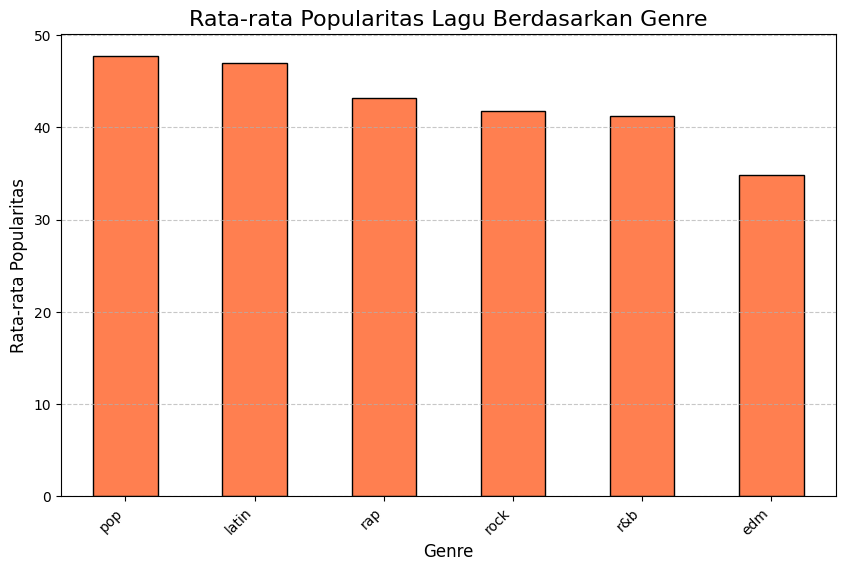

In [ ]:
# Lagu Populer Berdasarkan Genre
popular_tracks_by_genre = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
popular_tracks_by_genre.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Rata-rata Popularitas Lagu Berdasarkan Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rata-rata Popularitas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Durasi lagu mungkin memengaruhi popularitasnya. Scatterplot digunakan untuk menunjukkan hubungan antara durasi lagu (dalam menit) dan popularitas.

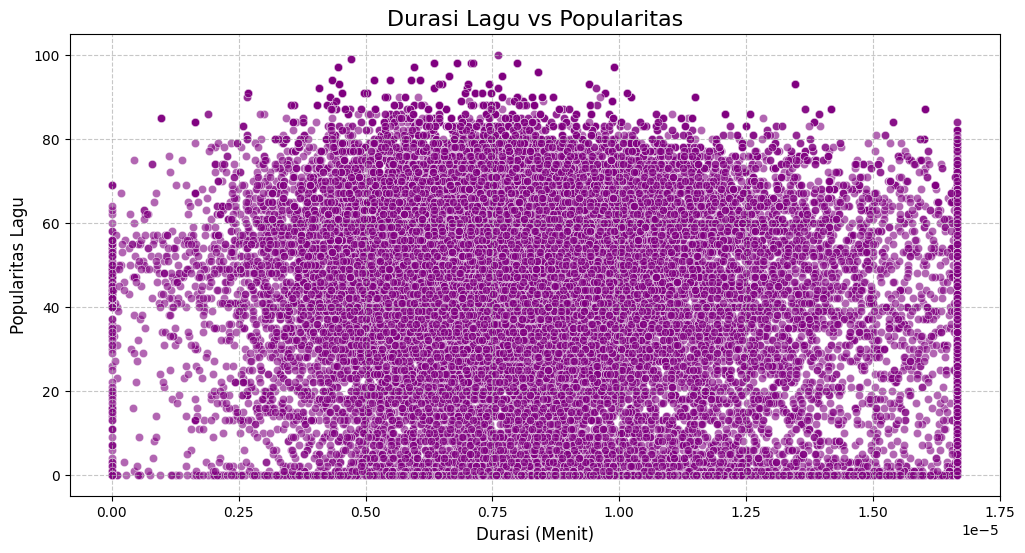

In [ ]:
# 4. Durasi Lagu vs Popularitas
df['duration_min'] = df['duration_ms'] / 60000  # Konversi ms ke menit

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='duration_min', y='track_popularity', alpha=0.6, color='purple')
plt.title('Durasi Lagu vs Popularitas', fontsize=16)
plt.xlabel('Durasi (Menit)', fontsize=12)
plt.ylabel('Popularitas Lagu', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

Tahun rilis lagu mungkin memengaruhi tingkat popularitasnya. Visualisasi digunakan untuk menilai tren rata-rata popularitas dari tahun ke tahun.

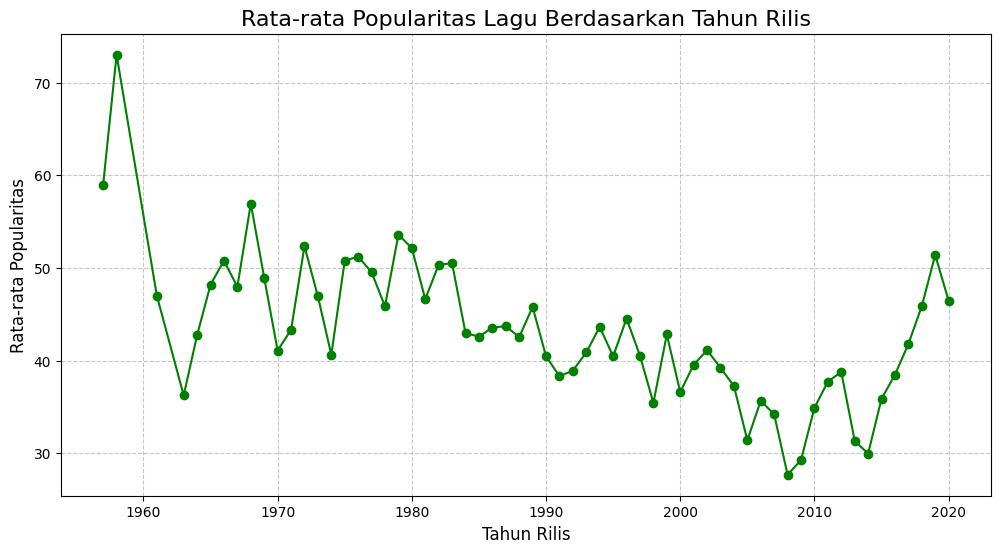

In [ ]:
# Pembuatan Variabel Baru: Tahun Rilis
df['release_year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year
average_popularity_by_year = df.groupby('release_year')['track_popularity'].mean()

plt.figure(figsize=(12, 6))
average_popularity_by_year.plot(color='green', marker='o')
plt.title('Rata-rata Popularitas Lagu Berdasarkan Tahun Rilis', fontsize=16)
plt.xlabel('Tahun Rilis', fontsize=12)
plt.ylabel('Rata-rata Popularitas', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

Lagu dikategorikan berdasarkan popularitas menjadi tiga kelas: rendah, sedang, dan tinggi. Tujuannya adalah melihat distribusi lagu-lagu berdasarkan kategori ini dan genre.

In [ ]:
# Membuat variabel baru: Kategori Popularitas Lagu
# Kategori berdasarkan popularitas: rendah (0-30), sedang (31-70), tinggi (71-100)
def categorize_popularity(popularity):
    if popularity <= 30:
        return 'Low'
    elif 31 <= popularity <= 70:
        return 'Medium'
    else:
        return 'High'

df['popularity_category'] = df['track_popularity'].apply(categorize_popularity)

# Distribusi Popularitas Berdasarkan Genre
popularity_by_genre = df.groupby(['playlist_genre', 'popularity_category'])['track_popularity'].count().unstack()

# Membandingkan Durasi Rata-rata dan Popularitas Berdasarkan Genre
average_duration_popularity = df.groupby('playlist_genre').agg({
    'duration_ms': 'mean',
    'track_popularity': 'mean'
}).rename(columns={'duration_ms': 'average_duration_ms', 'track_popularity': 'average_popularity'})

# Konversi durasi ke menit untuk interpretasi
average_duration_popularity['average_duration_min'] = average_duration_popularity['average_duration_ms'] / 60000

# Tingkat Energi dan Keakustikan
# Tingkat energi di atas rata-rata digolongkan sebagai 'Energetic', lainnya 'Calm'
# Tingkat keakustikan di atas rata-rata digolongkan sebagai 'Acoustic', lainnya 'Non-acoustic'
energy_threshold = df['energy'].mean()
acousticness_threshold = df['acousticness'].mean()

df['energy_level'] = df['energy'].apply(lambda x: 'Energetic' if x > energy_threshold else 'Calm')
df['acoustic_level'] = df['acousticness'].apply(lambda x: 'Acoustic' if x > acousticness_threshold else 'Non-acoustic')

energy_acoustic_summary = df.groupby(['playlist_genre', 'energy_level', 'acoustic_level']).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

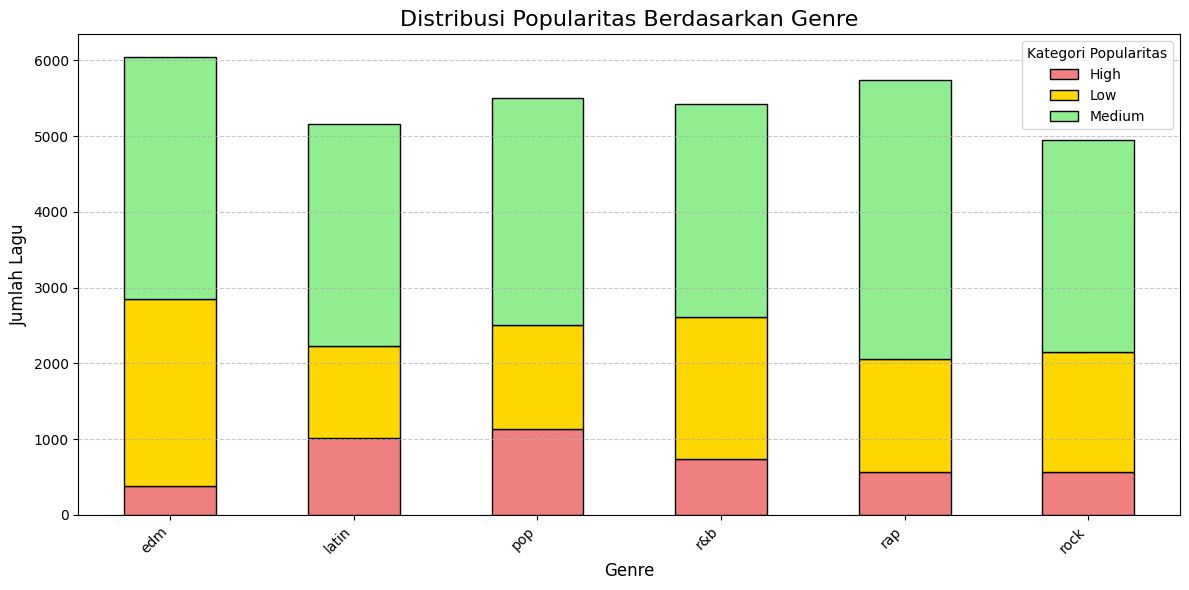

In [ ]:
plt.figure(figsize=(12, 6))
popularity_by_genre.plot(
    kind='bar', stacked=True, figsize=(12, 6),
    color=['lightcoral', 'gold', 'lightgreen'], edgecolor='black'
)
plt.title('Distribusi Popularitas Berdasarkan Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Jumlah Lagu', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kategori Popularitas', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


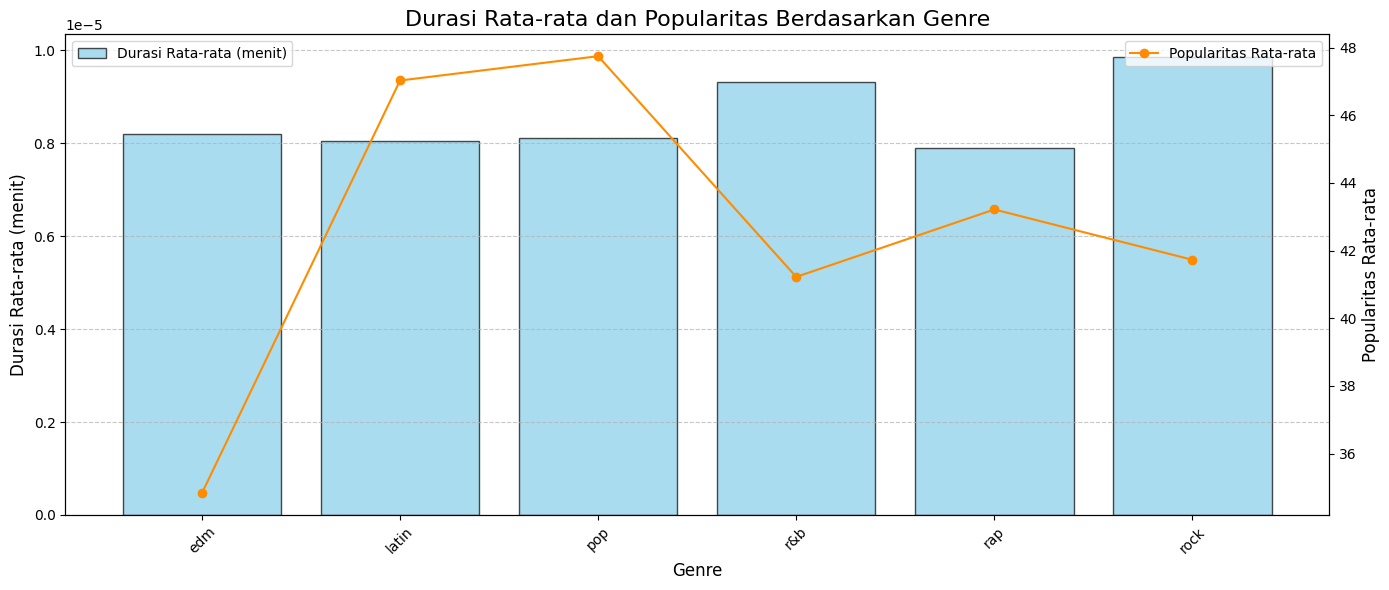

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Durasi rata-rata dalam menit
ax1.bar(
    average_duration_popularity.index,
    average_duration_popularity['average_duration_min'],
    color='skyblue', label='Durasi Rata-rata (menit)', alpha=0.7, edgecolor='black'
)
ax1.set_ylabel('Durasi Rata-rata (menit)', fontsize=12)
ax1.set_xlabel('Genre', fontsize=12)
ax1.set_title('Durasi Rata-rata dan Popularitas Berdasarkan Genre', fontsize=16)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Popularitas rata-rata
ax2 = ax1.twinx()
ax2.plot(
    average_duration_popularity.index,
    average_duration_popularity['average_popularity'],
    color='darkorange', marker='o', label='Popularitas Rata-rata'
)
ax2.set_ylabel('Popularitas Rata-rata', fontsize=12)
ax2.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


Lagu diklasifikasikan berdasarkan tingkat energi dan keakustikan. Distribusi ini membantu memahami bagaimana karakteristik audio lagu berhubungan dengan genre.

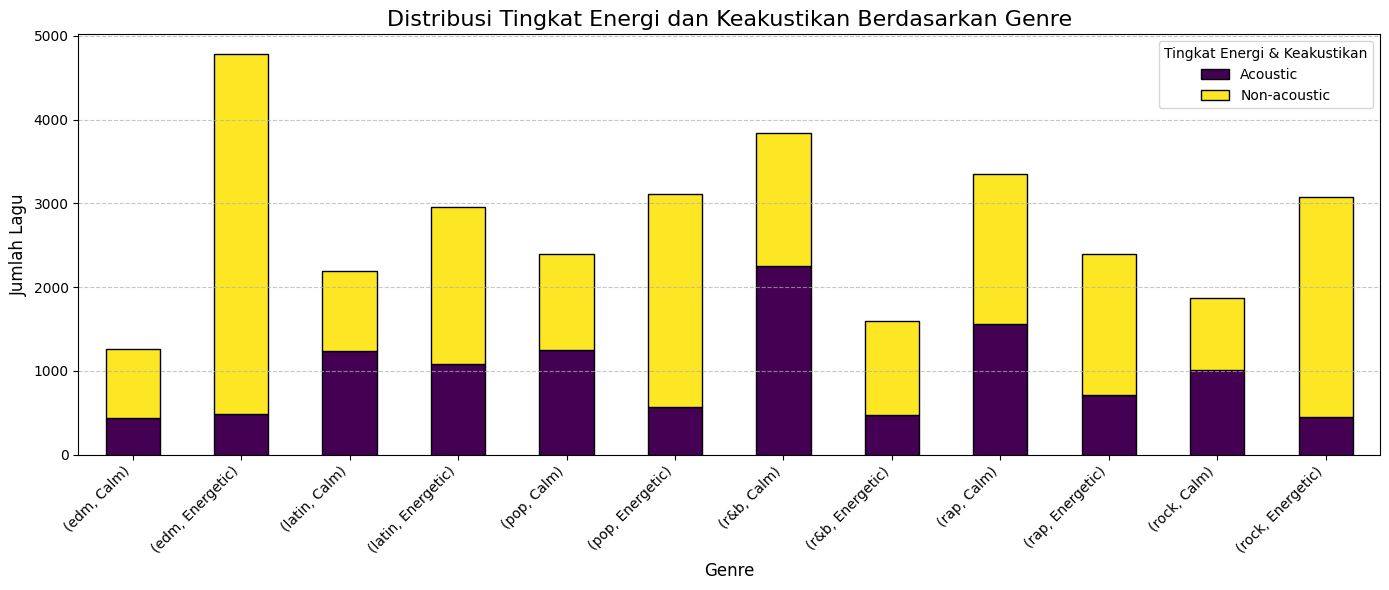

In [ ]:
energy_acoustic_summary.plot(
    kind='bar', stacked=True, figsize=(14, 6),
    cmap='viridis', edgecolor='black'
)
plt.title('Distribusi Tingkat Energi dan Keakustikan Berdasarkan Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Jumlah Lagu', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tingkat Energi & Keakustikan', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Preproccess

Dalam tahap preprocessing data, langkah penting adalah menangani nilai yang hilang (missing values). Pada kode ini, kami fokus pada fitur numerik yang mungkin memiliki data kosong atau null. Beberapa fitur numerik yang diidentifikasi adalah sebagai berikut:

- valence
- energy
- danceability
- tempo
- duration_ms

Untuk setiap fitur di atas, nilai yang hilang diisi (imputasi) menggunakan rata-rata (mean) dari kolom tersebut. Pendekatan ini dipilih karena rata-rata mampu mewakili distribusi data numerik dengan baik, khususnya jika data terdistribusi secara normal.

In [ ]:
# Handle Missing Values
numerical_features = ['valence', 'energy', 'danceability', 'tempo', 'duration_ms']
for col in numerical_features:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-18-48c70d7bd3cb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Tahap feature engineering bertujuan untuk meningkatkan kualitas data dengan menambahkan fitur baru yang relevan dan transformasi fitur yang ada untuk meningkatkan performa model.

Fitur tempo dinormalisasi untuk memastikan skala nilainya seragam, menggunakan metode z-score normalization melalui kelas StandardScaler dari pustaka sklearn. Nilai yang telah dinormalisasi disimpan ke dalam kolom baru tempo_normalized. Normalisasi ini penting untuk fitur numerik yang memiliki skala nilai berbeda.

In [ ]:
# Feature Engineering
# Add normalized tempo and new feature for energy-to-tempo ratio
scaler = StandardScaler()
df['tempo_normalized'] = scaler.fit_transform(df[['tempo']])
df['energy_to_tempo'] = df['energy'] / (df['tempo_normalized'] + 1e-5)

df['party_suitability'] = df['energy'] * df['danceability']

Tahapan encoding pada variabel kategorikal dilakukan untuk mengonversi data kategorikal menjadi format numerik yang dapat digunakan dalam algoritma pembelajaran mesin.

Variabel kategorikal playlist_genre diubah menjadi bentuk numerik menggunakan metode One-Hot Encoding. Proses ini dilakukan dengan menggunakan kelas OneHotEncoder dari pustaka sklearn.

Proses encoding ini penting untuk memastikan bahwa variabel kategorikal dapat digunakan oleh algoritma pembelajaran mesin, terutama yang bekerja dengan data numerik seperti regresi linier, pohon keputusan, atau algoritma berbasis jarak (misalnya KNN). One-hot encoding mencegah algoritma menginterpretasikan kategori sebagai nilai ordinal, sehingga membantu model memahami data dengan lebih baik.

In [ ]:
# Encode Categorical Variables
encoder = OneHotEncoder(sparse_output=False)
genre_encoded = encoder.fit_transform(df[['playlist_genre']])
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['playlist_genre']))
df = pd.concat([df.reset_index(drop=True), genre_encoded_df], axis=1)

Pada tahap ini, dataset dipersiapkan untuk proses pelatihan model dengan menentukan fitur (input) dan target (output) yang akan digunakan dalam prediksi genre lagu di dalam dataset.

**Fitur Numerik**: Fitur numerik yang relevan digunakan, termasuk:
- *valence*: Indikator emosi positif dari musik.
- *energy*: Tingkat energi musik.
- *danceability*: Tingkat kemudahan musik untuk menari.
- *party_suitability*: Kombinasi energi dan danceability yang merepresentasikan kecocokan untuk pesta.
- *tempo_normalized*: Tempo musik yang telah dinormalisasi.
- *energy_to_tempo*: Rasio antara energi musik dan tempo.

**Fitur Target** : Kolom *playlist_genre* digunakan sebagai target. Target ini mewakili label kategori genre musik yang akan diprediksi oleh model.

In [ ]:
# Features and Target
features = [
    'valence', 'energy', 'danceability', 'party_suitability', 'tempo_normalized', 'energy_to_tempo'
] + list(genre_encoded_df.columns)
target = 'playlist_genre'

X = df[features]
y = df[target]

Langkah ini dilakukan untuk membagi dataset menjadi dua bagian utama: data pelatihan dan data pengujian. Pemisahan ini bertujuan untuk melatih model pada data pelatihan dan mengevaluasinya pada data pengujian yang belum pernah dilihat oleh model, sehingga dapat mengukur performa model secara objektif.

**Proses Pemisahan**
- Input dan Target: Dataset X (fitur) dan y (target) dipisahkan menggunakan fungsi train_test_split.

**Parameter:**
- test_size=0.2: 20% dari data digunakan untuk pengujian, sementara 80% sisanya digunakan untuk pelatihan.
- random_state=42: Menjamin bahwa pembagian data konsisten dan dapat direproduksi.

In [ ]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display information about splits
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")
print("\nSelected Features:")
print(features)

Training data shape: (26266, 12), Test data shape: (6567, 12)

Selected Features:
['valence', 'energy', 'danceability', 'party_suitability', 'tempo_normalized', 'energy_to_tempo', 'playlist_genre_edm', 'playlist_genre_latin', 'playlist_genre_pop', 'playlist_genre_r&b', 'playlist_genre_rap', 'playlist_genre_rock']


**Hasil Data Splitting**

**Training Data:**
- Ukuran: 26,266 baris dan 12 kolom. Digunakan untuk melatih model.
**Test Data:**
- Ukuran: 6,567 baris dan 12 kolom. Digunakan untuk mengevaluasi performa model.

# Build Model

Langkah berikutnya adalah mempersiapkan model dan mendefinisikan grid hyperparameter untuk pencarian kombinasi terbaik.

**Grid Hyperparameter untuk Penyempurnaan (Tuning)**
Pencarian hyperparameter dilakukan untuk menemukan konfigurasi yang optimal untuk model. Pada kasus ini, kita mendefinisikan beberapa parameter yang akan dicoba dengan berbagai nilai:

- n_neighbors: Jumlah tetangga yang akan dipertimbangkan saat melakukan prediksi. Nilai yang akan dicoba: [3, 5, 7, 9, 11].
- weights: Fungsi bobot yang digunakan untuk menghitung prediksi berdasarkan jarak. Dua pilihan:
  - uniform: Semua tetangga memiliki bobot yang sama.
  - distance: Bobot dihitung berdasarkan jarak, semakin dekat tetangga, semakin besar bobotnya.
- metric: Metode yang digunakan untuk menghitung jarak antar data. Beberapa pilihan:
  - euclidean: Jarak Euclidean (jarak garis lurus).
  - manhattan: Jarak Manhattan (jarak sepanjang garis-garis horisontal atau vertikal).
  - minkowski: Jarak Minkowski, yang merupakan generalisasi dari Euclidean dan Manhattan.

In [ ]:
# Initialize KNN Model
knn = KNeighborsClassifier()

# Define Hyperparameter Grid for Tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

Setelah melakukan pencarian grid dengan GridSearchCV untuk menemukan kombinasi hyperparameter terbaik.

In [ ]:
# Perform Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best Hyperparameters
best_knn = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# Train the Best KNN Model
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

# Evaluasi Model

In [ ]:
# Step 5: Evaluate the Model
y_pred = best_knn.predict(X_test)

# Print Accuracy and Classification Report
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Visualize Cross-Validation Results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results[['param_n_neighbors', 'param_weights', 'param_metric', 'mean_test_score']]

print("\nGrid Search Results:")
print(cv_results.sort_values(by='mean_test_score', ascending=False))


Accuracy Score: 0.9971067458504644

Classification Report:
              precision    recall  f1-score   support

         edm       1.00      1.00      1.00      1218
       latin       1.00      1.00      1.00      1033
         pop       1.00      1.00      1.00      1081
         r&b       1.00      1.00      1.00      1031
         rap       1.00      1.00      1.00      1168
        rock       0.99      0.99      0.99      1036

    accuracy                           1.00      6567
   macro avg       1.00      1.00      1.00      6567
weighted avg       1.00      1.00      1.00      6567


Grid Search Results:
    param_n_neighbors param_weights param_metric  mean_test_score
11                  3      distance    manhattan         0.996992
13                  5      distance    manhattan         0.996688
15                  7      distance    manhattan         0.996497
10                  3       uniform    manhattan         0.996345
17                  9      distance    manhat

Hasil evaluasi model KNN menunjukkan performa yang sangat baik:

1. Akurasi:
- Skor akurasi pada data uji mencapai **99.71%**, yang menunjukkan bahwa model mampu mengklasifikasikan genre playlist dengan sangat tepat.
2. Laporan Klasifikasi:
- Precision, recall, dan f1-score semuanya sangat tinggi (mendekati 1) untuk setiap kategori genre.
- Semua genre (edm, latin, pop, r&b, rap, rock) memiliki performa sempurna atau sangat mendekati sempurna.
- Model ini menunjukkan kemampuan luar biasa untuk mengklasifikasikan data dengan ketepatan yang sangat baik.
3. Grid Search Results:
- Hyperparameter Terbaik: Kombinasi terbaik untuk model KNN adalah:
  - n_neighbors = 3
  - weights = distance
  - metric = manhattan
- Hasil pencarian grid menunjukkan bahwa pengaturan ini menghasilkan skor rata-rata uji terbaik (99.70%).
- Semua kombinasi hyperparameter lain juga menghasilkan hasil yang sangat baik, dengan sebagian besar memiliki skor di atas 99%.

Secara keseluruhan, model ini bekerja dengan sangat baik dan dapat digunakan untuk prediksi genre playlist dengan tingkat akurasi yang sangat tinggi.

**Confussion Matrix**

<Figure size 1000x800 with 0 Axes>

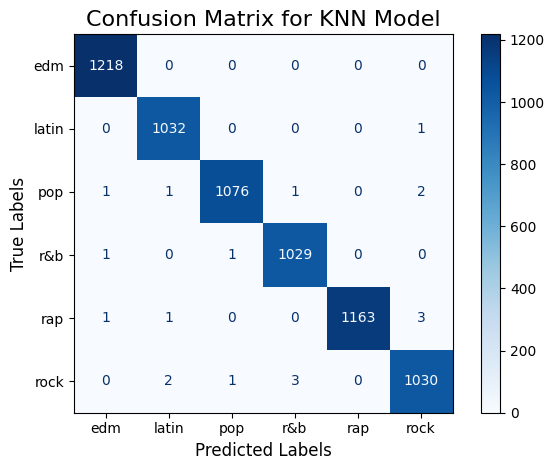

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Step 7: Display Confusion Matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)

# Step : Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for KNN Model", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.tight_layout()
plt.show()

**Evaluasi Performa Berdasarkan Genre**

1. Genre dengan Performa Tinggi
- **EDM**: Sebanyak 1218 lagu diklasifikasikan dengan benar tanpa kesalahan (0 kesalahan). Hal ini menunjukkan bahwa karakteristik fitur EDM sangat berbeda dan mudah dikenali oleh model.
- **Rap**: Dengan 1163 lagu benar dan hanya 4 kesalahan, genre ini juga menunjukkan performa tinggi, menandakan fitur seperti energi dan tempo mungkin unik.
- **Rock**: Terdapat 1030 lagu benar dan hanya 6 kesalahan, menunjukkan fitur seperti durasi dan akustikan mungkin cukup spesifik untuk genre ini.

2. Genre dengan Potensi Kesalahan
- **Pop dan Latin**:
 - Genre pop memiliki 5 kesalahan (3 lagu diprediksi sebagai Latin, dan lainnya sebagai genre berbeda). Kesalahan ini terjadi mungkin karena fitur pop dan Latin saling tumpang tindih, seperti melodi yang serupa.
 - Latin memiliki 1 kesalahan, di mana satu lagu diprediksi sebagai Pop. Hal ini juga dapat disebabkan oleh kesamaan fitur antara kedua genre.
- **R&B:**
  - Sebanyak 2 lagu dari genre ini salah diklasifikasikan sebagai genre lain, tetapi tingkat kesalahannya tetap rendah.

  Akurasi keseluruhan dapat dihitung dengan membandingkan jumlah prediksi yang benar dengan total prediksi. Berdasarkan data, sebagian besar prediksi berada di diagonal utama, yang menunjukkan performa tinggi model KNN. Tingkat akurasi sangat baik karena kesalahan hanya terjadi dalam jumlah kecil dan terbatas pada beberapa genre.

In [ ]:
# REKOMENDASI GENRE LAGU
def recommend_songs(input_song_index, num_recommendations=5):
    """
    Recommends songs based on the input song's features using k-NN.

    Args:
        input_song_index: The index of the song in the DataFrame.
        num_recommendations: The number of songs to recommend.

    Returns:
        A DataFrame containing the recommended songs.
    """

    # Extract features for the input song
    input_song_features = X.iloc[[input_song_index]]

    # Find nearest neighbors using the trained k-NN model
    distances, indices = best_knn.kneighbors(input_song_features, n_neighbors=num_recommendations + 1)  # +1 to include the input song itself


    recommended_song_indices = indices.flatten()[1:]  # Exclude the input song
    recommended_songs = df.iloc[recommended_song_indices]

    return recommended_songs


# Example usage
recommended_songs_df = recommend_songs(10)
print("\nRecommended Songs:")
print(recommended_songs_df[['track_name', 'track_artist', 'playlist_genre']])


Recommended Songs:
                                              track_name    track_artist  \
2093                                    Hey, Soul Sister           Train   
24759  Money Can't Buy You Love - Mo' Money/Soundtrac...  Ralph Tresvant   
16499               Paso a Huella - Captain Planet Remix        Novalima   
2610                      Treat You Better - Single Edit    RÜFÜS DU SOL   
2121                                             TiK ToK           Kesha   

      playlist_genre  
2093             pop  
24759            r&b  
16499          latin  
2610             pop  
2121             pop  


In [ ]:
import joblib

# Save the trained KNN model to a file
model_filename = 'knn_mood_model.pkl'
joblib.dump(best_knn, model_filename)

print(f"Model has been saved to {model_filename}")


Model has been saved to knn_mood_model.pkl


**Analisi**

1. **Keunggulan Model KNN**
- Sederhana dan Efisien: Model KNN bekerja baik untuk dataset ini tanpa memerlukan pelatihan model yang kompleks.
- Akurasi Tinggi: Hasil menunjukkan bahwa model dapat menangkap pola dalam data dengan sangat baik.
- Kemampuan Diskriminasi: Genre dengan karakteristik unik seperti EDM, Rap, dan Rock sangat mudah dikenali oleh model.


2. **Kelemahan dan Potensi Perbaikan**
- Tumpang Tindih Fitur: Kesalahan terjadi terutama antara genre dengan fitur serupa, seperti Pop dan Latin. Hal ini dapat diperbaiki dengan:
 - Seleksi Fitur Lebih Baik: Menambahkan fitur seperti lirik atau key signature untuk membedakan genre dengan lebih baik
 - Peningkatan Data: Menambahkan lebih banyak data pelatihan untuk genre yang cenderung mirip.
-  Pemilihan Parameter: Model KNN sangat dipengaruhi oleh parameter seperti jumlah tetangga (K) dan metrik jarak. Eksperimen lebih lanjut dengan parameter ini dapat meningkatkan akurasi.

Confusion matrix menunjukkan bahwa model KNN adalah pilihan yang sangat baik untuk klasifikasi genre musik pada dataset ini. Dengan akurasi tinggi, model mampu mengidentifikasi genre musik secara andal, terutama untuk genre seperti EDM, Rap, dan Rock. Namun, perbaikan dapat dilakukan untuk mengurangi kesalahan pada genre yang memiliki karakteristik mirip, seperti Pop dan Latin. Kombinasi metode seleksi fitur dan pengaturan parameter yang lebih optimal dapat lebih meningkatkan kinerja model.